# Class 3: Intro to Machine Learning Models
There are many types of machine learning models.  
We learned linear models yesterday and we will learn tree-based models today. <br>
Day 4 will be neural networks.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [7]:
# read in our dataset
filename = 'https://raw.githubusercontent.com/sayhellojoel/grade78pythonmath/main/Data/kids%20anonymous%20data.csv'
df = pd.read_csv(filename)

In [8]:
# show the first 5 lines from our dataset
df.head(5)

,Student,Class,AGE (Y/M),Age Decimal,HEIGHT,FOOT LENGTH,INDEX FINGER,# LETTERS,EYE COLOUR
0,1,78,12-11,12.9,174,26,10,5,Blue
1,2,78,13/11,13.9,173,24,9,5,Green
2,3,78,13\6,13.5,173,28,9,5,Brown
3,4,78,13/12,13.9,152,22,8,5,Brown
4,5,78,13/8,13.7,162,23,9,5,Green


## 1) Decision Tree Model

In [9]:
# preparing our data for the model
inputs = ['Age Decimal', 'FOOT LENGTH', 'INDEX FINGER'] # these are the variables we want to use as inputs
X = df[inputs]
y = df['HEIGHT']

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [10]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

# Creating the Decision Tree model
model_dt = DecisionTreeRegressor(random_state=1, max_depth=2)

# Training the model
model_dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=1)

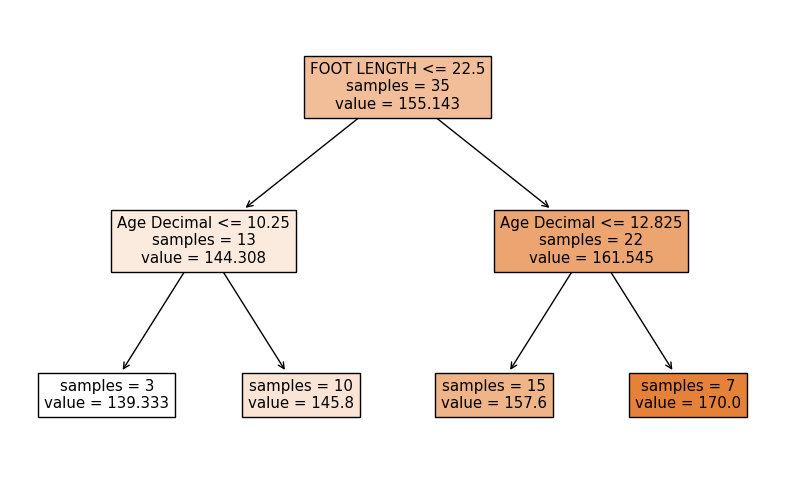

In [11]:
# Visualizing the tree
plt.figure(figsize=(10,6))
plot_tree(model_dt, filled=True, feature_names=inputs, impurity=False)
plt.show()

## 2) Random Forest Model

In [12]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=1, max_depth=2, n_estimators=100) # makes a forest with 100 trees
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=1)

In [13]:
pd.DataFrame({'Variables': inputs, 'Importance': rf_model.feature_importances_})

,Variables,Importance
0,Age Decimal,0.160312
1,FOOT LENGTH,0.830821
2,INDEX FINGER,0.008867


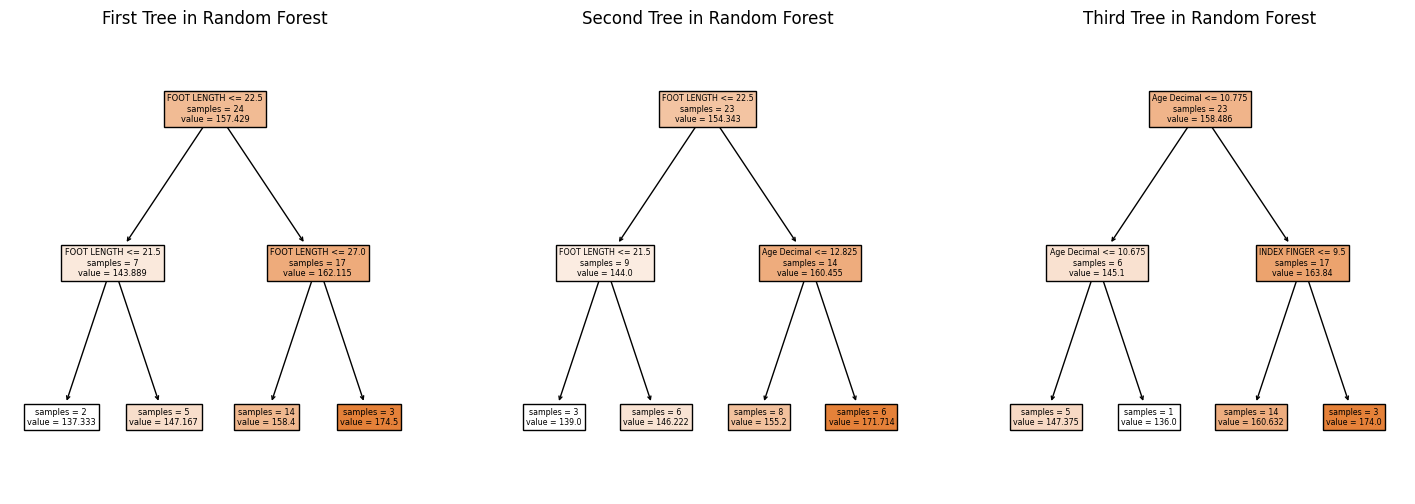

In [18]:
# Selecting one tree from the forest
tree_rf1 = rf_model.estimators_[0]  # Change the index to view different trees
tree_rf2 = rf_model.estimators_[50]  # Change the index to view different trees
tree_rf3 = rf_model.estimators_[99]  # Change the index to view different trees

plt.figure(figsize=(18,6))

plt.subplot(1, 3, 1)
plot_tree(tree_rf1, filled=True, feature_names=inputs, impurity=False)
plt.title('First Tree in Random Forest')

plt.subplot(1, 3, 2)
plot_tree(tree_rf2, filled=True, feature_names=inputs, impurity=False)
plt.title('Second Tree in Random Forest')

plt.subplot(1, 3, 3)
plot_tree(tree_rf3, filled=True, feature_names=inputs, impurity=False)
plt.title('Third Tree in Random Forest')
plt.show()

## 3) Evaluating Models
If we were predicting a discrete variable, we can use <b>accuracy</b>. Accuracy is the percent of time the prediction is correct.  
But we are predicting a continuous variable. So instead we can look at the average our prediction is off by.  
This is called Mean Absolute Error (MAE).  

In [15]:
# maybe split by train/test split at the start and save it for this part... and still call X_train as X to make it easier to understand earlier in the process

